In [1]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ipywidgets as ipy
ipy.IntSlider()


IntSlider(value=0)

In [3]:
import tensorflow as tf
import zipfile
import os
import pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Step 1: Download ZIP (no extract)
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=False)

# Step 2: Extract manually
extract_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(zip_path))

# Step 3: Define dataset paths
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'validation')

# Step 4: Load the datasets
train_ds = image_dataset_from_directory(train_dir, image_size=(180, 180), batch_size=32)
val_ds = image_dataset_from_directory(val_dir, image_size=(180, 180), batch_size=32)

# Step 5: Show class names
print("Classes:", train_ds.class_names)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Classes: ['cats', 'dogs']


In [5]:
print(train_ds.class_names)
total_images = 0
for batch in train_ds:
    total_images += batch[0].shape[0]
print("Total training images:", total_images)


['cats', 'dogs']
Total training images: 2000


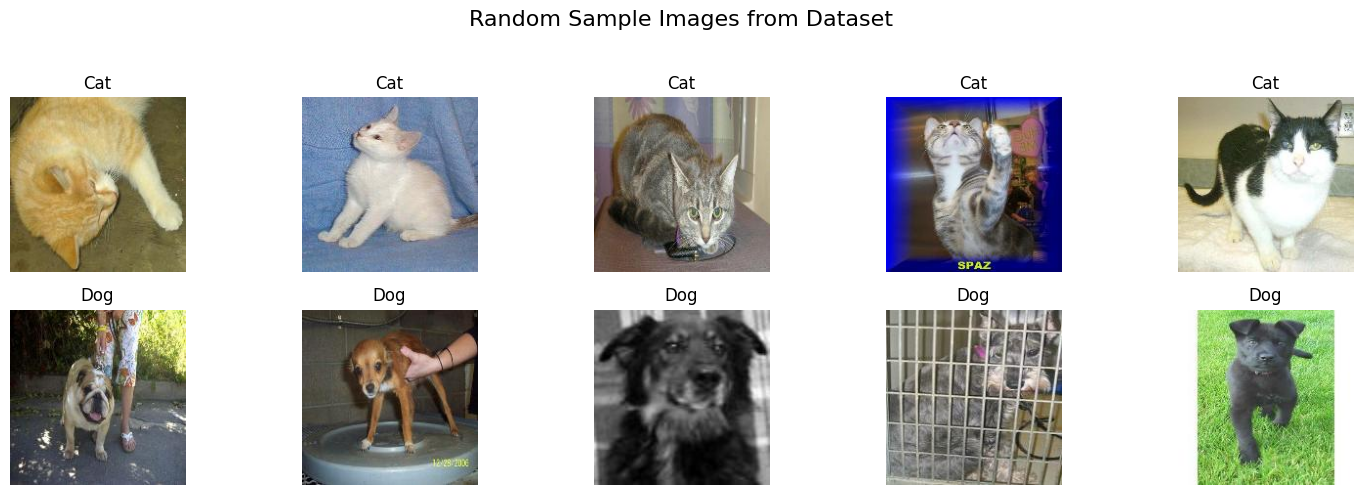

In [16]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set your dataset path
dataset_path = "cats_vs_dogs/train"  # adjust as needed

# Number of images to show per class
n = 5

# Define class folders
classes = ["cats", "dogs"]

# Set up the plot
fig, axes = plt.subplots(len(classes), n, figsize=(n*3, 2.5*len(classes)))
fig.suptitle("Random Sample Images from Dataset", fontsize=16)

for row, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    selected = random.sample(image_files, min(n, len(image_files)))

    for col in range(n):
        ax = axes[row, col] if len(classes) > 1 else axes[col]
        img_path = os.path.join(class_dir, selected[col])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{class_name[:-1].capitalize()}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [4]:
import os
import tensorflow as tf

# Get class names from dataset
class_names = train_ds.class_names

# Save images from the dataset
i = 0
for images, labels in train_ds.unbatch():  # Unbatch to get (image, label) pairs
    image = tf.cast(images, tf.uint8)  # Ensure correct dtype
    label = int(labels.numpy())        # Convert Tensor -> int

    # Set output folder and filename
    save_dir = f'./cats_vs_dogs/train/{class_names[label]}'
    os.makedirs(save_dir, exist_ok=True)
    filename = f"{save_dir}/{class_names[label]}_{i}.jpg"

    # Save image
    tf.keras.preprocessing.image.save_img(filename, image.numpy())
    i += 1

print(f"✅ Saved {i} images to ./cats_vs_dogs/train/")


✅ Saved 2000 images to ./cats_vs_dogs/train/


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [8]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('cats_vs_dogs/train',
                                              target_size = (150, 150), 
                                              batch_size=32, 
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('cats_vs_dogs/train',
                                              target_size = (150, 150), 
                                              batch_size=32, 
                                              class_mode='binary',
                                              subset='validation')

Found 2406 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [9]:
# build CNN Model


In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),  # ✅ Proper usage
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])


c:\Users\SATWIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637,377 (40.58 MB)

 Trainable params: 10,636,929 (40.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.7316 - loss: 0.5590 - val_accuracy: 0.6333 - val_loss: 0.7859
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.7557 - loss: 0.5094 - val_accuracy: 0.7000 - val_loss: 0.5708
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.7700 - loss: 0.4679 - val_accuracy: 0.7383 - val_loss: 0.5107
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8004 - loss: 0.4463 - val_accuracy: 0.7517 - val_loss: 0.4937
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8042 - loss: 0.4231 - val_accuracy: 0.6683 - val_loss: 0.6264


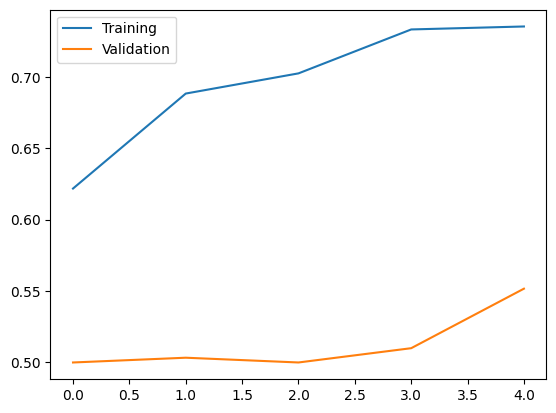

In [17]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])


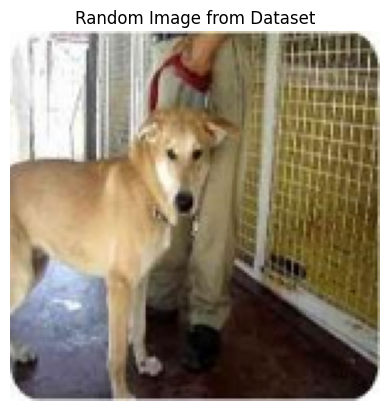

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
✅ Predicted Class: Cat
🔍 Confidence: 91.53%
📁 Actual Folder: dogs


In [29]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Paths
data_dir = "./cats_vs_dogs/train"
model_path = "cats_vs_dogs.keras"
class_labels = {0: "Cat", 1: "Dog"}

# Load model
model = load_model(model_path)

# Pick random class and image
classes = os.listdir(data_dir)
chosen_class = random.choice(classes)
img_list = os.listdir(os.path.join(data_dir, chosen_class))
random_img_path = os.path.join(data_dir, chosen_class, random.choice(img_list))

# Load and display image
img = Image.open(random_img_path).resize((150, 150))
plt.imshow(img)
plt.axis('off')
plt.title("Random Image from Dataset")
plt.show()

# Preprocess
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_batch)[0][0]
pred_class = int(prediction > 0.5)
confidence = prediction if pred_class == 1 else 1 - prediction

# Output
print(f"✅ Predicted Class: {class_labels[pred_class]}")
print(f"🔍 Confidence: {confidence:.2%}")
print(f"📁 Actual Folder: {chosen_class}")


In [ ]:
# save model
model.save('cats_vs_dogs.keras')

In [30]:
model_load = tf.keras.models.load_model('cats_vs_dogs.keras')

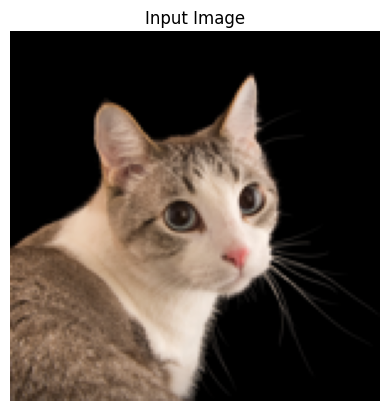

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
✅ Predicted label: cats


In [32]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image from URL
img_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Preprocess the image for prediction
image_array = image.img_to_array(img)
img_batch = np.expand_dims(image_array, axis=0)  # Add batch dimension
img_batch = img_batch / 255.0  # Normalize to [0,1]

# Predict using your trained model
prediction = model.predict(img_batch)

# Threshold the prediction
TH = 0.5
predicted_class = int(prediction[0][0] > TH)

# Map prediction to class name
classes = {v: k for k, v in train_generator.class_indices.items()}
predicted_label = classes[predicted_class]

print(f"✅ Predicted label: {predicted_label}")


'dog'